In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

import heasoftpy as hsp

from heasoftpy import xrtpipeline

In [3]:
obsid = "00030901044"
ra = 133.703646
dec = 20.108511
# set some parameters.
indir  = obsid
outdir = obsid + '_output'
stem   = 'sw' + obsid


import subprocess

# Define parameters
indir = "./00030901044"
outdir = "./00030901044_output"

# Construct the command
cmd = [
    "xrtpipeline",
    f"indir={indir}",
    f"steminputs=sw{obsid}",
    f"outdir={outdir}",
    f"srcra={ra}",
    f"srcdec={dec}",
    "createexpomap=yes",
    "cleanup=no",
    "clobber=yes"
]

# Run the command and redirect output to a log file
with open("xrt.log", "w") as logfile:
    subprocess.run(cmd, stdout=logfile, stderr=subprocess.STDOUT)

# call the tasks
# out = xrtpipeline(indir=indir, outdir=outdir, steminputs=stem, srcra=ra, srcdec=dec, clobber=True, createexpomap=True, cleanup=False, allow_failure=True, verbose=True)

In [35]:
import subprocess

xselect_commands = """
xsel
read event sw00030901053xpcw3po_cl.evt
/home/idies/workspace/Storage/navaneethpk/persistent/Talk_Swift/00030901053_output
yes
set binsize 50
extract all
save all my_lightcurve
exit
no
"""
#set binsize 50
process = subprocess.run(
    ["bash", "-c", "xselect"],
    input=xselect_commands,
    text=True
)

 
                         **  XSELECT V2.5c  **
 
> Enter session name >[xsel23714] 
xsel23714:XRISM > xsel
 Command not found; type ? for a command listing
xsel23714:XRISM > read event sw00030901053xpcw3po_cl.evt
> Enter the Event file dir >[/home/idies/workspace/Storage/navaneethpk/persistent/Talk_Swift/00030901055_output] /home/idies/workspace/Storage/navaneethpk/persistent/Talk_Swift/00030901053_output
Got new mission: SWIFT
> Reset the mission ? >[yes] yes
 
 
        OBJECT      OBS_ID      DATE-OBS                 DATAMODE
      1 OJ287       00030901053 2009-10-25T18:43:21.5539 PHOTON
 
 Notes: XSELECT set up for      SWIFT
 Time keyword is TIME       in units of s
 Default timing binsize =   5.0000
 
Setting...
 Image  keywords   = X          Y           with binning =    1
 WMAP   keywords   = X          Y           with binning =    1
 Energy keyword   = PI                     with binning =    1
 
Getting Min and Max for Energy Column...
Got min and max for PI:     0   102

In [36]:
from astropy.io import fits
from astropy.table import Table

fits_file = 'my_lightcurve.lc'

# Open the FITS file
with fits.open(fits_file) as hdul:
    # Print info about all HDUs
    hdul.info()
    rate_hdu = hdul[1]
    rate_table = Table(rate_hdu.data)

print(rate_table)

Filename: my_lightcurve.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     756   ()      
  1  RATE          1 BinTableHDU    691   107R x 4C   [D, E, E, E]   
  2  GTI           1 BinTableHDU     55   7R x 2C   [1D, 1D]   
  TIME     RATE      ERROR     FRACEXP 
------- --------- ----------- ---------
    0.0      0.46  0.09591664       1.0
   50.0      0.48  0.09797959       1.0
  100.0      0.54 0.103923045       1.0
  150.0       0.5         0.1       1.0
  200.0      0.48  0.09797959       1.0
  250.0      0.72        0.12       1.0
  300.0      0.62  0.11135528       1.0
  350.0      0.78  0.12489996       1.0
  400.0      0.54 0.103923045       1.0
  450.0       0.6 0.109544516       1.0
    ...       ...         ...       ...
22200.0      0.46  0.09591664       1.0
22250.0      0.52  0.10198039       1.0
22300.0      0.52  0.10198039       1.0
22350.0       0.5         0.1       1.0
22400.0      0.58   0.1077033       1.0
22450.

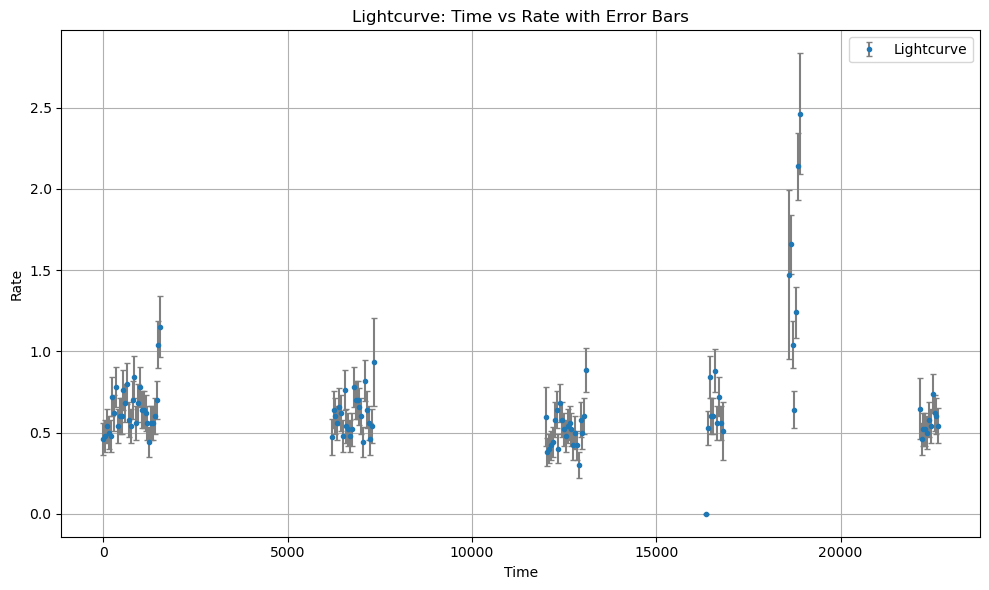

In [37]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Open the FITS file and extract RATE HDU
with fits.open('my_lightcurve.lc') as hdul:
    data = hdul[1].data  # RATE table

    # Extract columns
    time = data['TIME']
    rate = data['RATE']
    error = data['ERROR']

# Plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(time, rate, yerr=error, fmt='o', markersize=3, ecolor='gray', capsize=2, label='Lightcurve')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Lightcurve: Time vs Rate with Error Bars')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# write region files
region = 'circle(133.7036000,20.1085000,40.000")'
with open('src.reg', 'w') as fp: fp.write(region)

region = 'circle(133.6291073,20.0514248,100.000")'
with open('bkg.reg', 'w') as fp: fp.write(region)

In [38]:
import subprocess

xselect_commands = """
xsel
read event sw00030901053xpcw3po_cl.evt
/home/idies/workspace/Storage/navaneethpk/persistent/Talk_Swift/00030901053_output
yes
extract image
filter region src.reg
extract spectrum
save spectrum spec.pi
clear region
filter region bkg.reg
extract spectrum
save spectrum spec_bkg.pi
exit
no
"""

process = subprocess.run(
    ["bash", "-c", "xselect"],
    input=xselect_commands,
    text=True
)

 
                         **  XSELECT V2.5c  **
 
> Enter session name >[xsel23714] 
xsel23714:XRISM > xsel
 Command not found; type ? for a command listing
xsel23714:XRISM > read event sw00030901053xpcw3po_cl.evt
> Enter the Event file dir >[/home/idies/workspace/Storage/navaneethpk/persistent/Talk_Swift/00030901053_output] /home/idies/workspace/Storage/navaneethpk/persistent/Talk_Swift/00030901053_output
Got new mission: SWIFT
> Reset the mission ? >[yes] yes
 
 
        OBJECT      OBS_ID      DATE-OBS                 DATAMODE
      1 OJ287       00030901053 2009-10-25T18:43:21.5539 PHOTON
 
 Notes: XSELECT set up for      SWIFT
 Time keyword is TIME       in units of s
 Default timing binsize =   5.0000
 
Setting...
 Image  keywords   = X          Y           with binning =    1
 WMAP   keywords   = X          Y           with binning =    1
 Energy keyword   = PI                     with binning =    1
 
Getting Min and Max for Energy Column...
Got min and max for PI:     0   102

In [40]:
import subprocess

# Define the command as a list of arguments
cmd = [
    "xrtmkarf",
    "outfile=spec.arf",
    "phafile=spec.pi",
    "expofile=/home/idies/workspace/Storage/navaneethpk/persistent/Talk_Swift/00030901053_output/sw00030901053xpcw3po_ex.img",
    "srcx=-1",
    "srcy=-1",
    "psfflag=yes"
]

# Run the command
try:
    subprocess.run(cmd, check=True)
    print("xrtmkarf ran successfully.")
except subprocess.CalledProcessError as e:
    print(f"Error running xrtmkarf: {e}")



---------------------------------------------------------------
		Running 'xrtmkarf_0.6.4'
---------------------------------------------------------------
		 Input Parameters List: 
Name of the input RMF file                    :'CALDB'
Name of the input mirror effective area file  :'CALDB'
Name of the input filter transmission file    :'CALDB'
Name of the input arf file                    :'CALDB'
Name of the input exposure map file           :'/home/idies/workspace/Storage/navaneethpk/persistent/Talk_Swift/00030901053_output/sw00030901053xpcw3po_ex.img'
Name of the input vignetting file             :'CALDB'
Name of the input spectrum file               :'spec.pi'
Name of the input PSF file                    :'CALDB'
Name of the output ARF file                   :'spec.arf'
Source SKYX                                   :'-1.000000'
Source SKYY                                   :'-1.000000'
Source off-axis angle (arcmin)                :'-99.000000'
Extended source?                  


FITSIO status = 107: tried to move past end of file
ERROR: Operation not permitted
Task xrtmkarf 0.6.4 terminating with status 1


In [53]:
from astropy.io import fits

# Open the spectrum file (PHA file) in update mode
pha_filename = "spec.pi"  # your input spectrum file
with fits.open(pha_filename, mode='update') as hdul:
    hdr = hdul[1].header  # Typically, the spectrum header is in extension 1

    # Set the required keywords
    hdr['BACKFILE'] = 'spec_bkg.pi'
    hdr['ANCRFILE'] = 'spec.arf'
    hdr['RESPFILE'] = 'swxpc0to12s6_20010101v011.rmf'

    # Save changes
    hdul.flush()

print("Keywords updated successfully.")

Keywords updated successfully.


In [61]:
import os 
import sys
import numpy as np
import pandas as pd
from xspec import *


# pha = "spec.pi"

ch = Xset.chatter
Xset.chatter = 20
lch = Xset.logChatter
Xset.logChatter = 20
logFile = Xset.openLog("xspec.log")
logFile = Xset.log

s1 = Spectrum("spec.pi")
s1.response = "swxpc0to12s6_20010101v011.rmf"
s1.response.arf = "spec.arf"
s1.background = "spec_bkg.pi"
AllData.ignore("bad")
s1.ignore("**-0.3,10.0-**")

m1 = Model("tbabs*powerlaw")
m1.TBabs.nH = 0.0237
m1.TBabs.nH.frozen = True
m1.powerlaw.PhoIndex = 1.0
Fit.nIterations = 100
Fit.statMethod = "chi"
Fit.perform()
Fit.show()

AllModels.calcFlux("0.3 10.0 err")

Plot.device = f"plot.ps"
Plot.xAxis = "Hz"
Plot.xLog = True
Plot.yLog = True
Plot.setRebin(20, 20)
Plot("eeufspec","ratio")

Plot.device = "/null"
Plot("eeufspec")
xVals = Plot.x()
yVals = Plot.y()
modVals = Plot.model()
yErrs = Plot.yErr()
dataM = np.column_stack((xVals, yVals, yErrs, modVals))
np.savetxt("spec.csv", dataM, delimiter=",", header="xVals,yVals,yErrs,modVals", comments="")
Plot("ratio")
xVals = Plot.x()
yVals = Plot.y()
yErrs = Plot.yErr()
dataR = np.column_stack((xVals, yVals, yErrs))
np.savetxt("ratio.csv", dataR, delimiter=",", header="xVals,yVals,yErrs", comments="")

AllData.clear()
Xset.closeLog()

Logging to file: xspec.log

1 spectrum  in use
 
Spectral Data File: spec.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.711e-01 +/- 1.797e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-1024
  Telescope: SWIFT Instrument: XRT  Channel Type: PI
  Exposure Time: 1458 sec
 Using fit statistic: chi
 No response loaded.
 Grouping data :
   1024 channels grouped to 1024
        1 ++++++++++++++++++++++++++++++++++++++++++++++++++
       51 ++++++++++++++++++++++++++++++++++++++++++++++++++
      101 ++++++++++++++++++++++++++++++++++++++++++++++++++
      151 ++++++++++++++++++++++++++++++++++++++++++++++++++
      201 ++++++++++++++++++++++++++++++++++++++++++++++++++
      251 ++++++++++++++++++++++++++++++++++++++++++++++++++
      301 ++++++++++++++++++++++++++++++++++++++++++++++++++
      351 ++++++++++++++++++++++++++++++++++++++++++++++++++
      401 ++++++++++++++++++++++++++++++++++++++++++++++++++
      451 ++++++++++++++++++++++++++++++++++++++++++

***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit

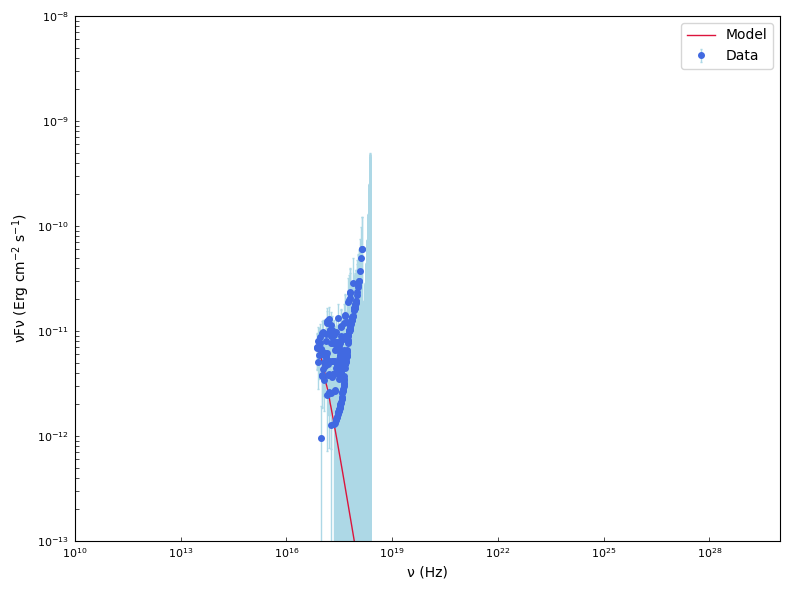

In [60]:
import os 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, LogLocator

phapath = os.getcwd()

scsv = os.path.join(phapath, "spec.csv")
df_spect = pd.read_csv(scsv)
x1, y1, y1e, mdl = df_spect["xVals"], df_spect["yVals"], df_spect["yErrs"], df_spect["modVals"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(x1, y1, yerr=y1e, fmt="o", markersize=4, label="Data", color="royalblue", ecolor="lightblue", elinewidth=1, capsize=1)
ax.plot(x1, mdl, label="Model", color="crimson", linestyle="-", linewidth=1)
ax.legend()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e10, 1e30)
ax.set_ylim(1e-13, 1e-8) 
ax.set_xlabel('ν (Hz)')
ax.set_ylabel(r'νFν (Erg cm$^{-2}$ s$^{-1}$)')
ax.tick_params(axis="both", direction="in", length=3, width=0.5, colors="black", pad=4, which="both", labelsize=8)
plt.tight_layout()
plt.savefig(f"{phapath}/spec.png", dpi=300, bbox_inches="tight")
plt.show()